## Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice).


In [1]:
# import pandas
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import or load the json file and convert it to pandas dataframe
import json
with open('ultimate_data_challenge.json') as f:
    data = json.load(f)
df = pd.DataFrame(data)

In [3]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


We have missing data in 'avg_rating_by_driver' and 'avg_rating_of_driver' because sometimes the driver and rider both may have forgotten to give ratings to the rider. I would always consult with my peers in my team about what method to use to fill up NaN values. For this project, I will use the highest rating for any unrated trips. 

The 'last_trip_date' and 'signup_date' column are both string. I will convert them to datetime. 

The 'phone' column also has some missing data. I will fill the missing data with 'others'.

In [5]:
# Convert last_trip_date and signup_date to datetime
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [6]:
# Find number of active days and convert it into a float
df['num_active_days'] = (df['last_trip_date']-df['signup_date']) / timedelta(days=1)

In [7]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,num_active_days
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170.0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47.0


In [8]:
df['retention'] = np.where(df['num_active_days']<30, 0, 1)

In [9]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,num_active_days,retention
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96.0,1
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170.0,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47.0,1


In [10]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,num_active_days,retention
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000,50000.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158,92.790100,0.742580
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652,62.129822,0.437217
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000,27.000000,0.000000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000,110.000000,1.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000,150.000000,1.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000,181.000000,1.000000


In [11]:
df.avg_rating_by_driver.mean()

4.77815819594771

In [12]:
# Fill the null values with mean rating for both avg_rating_by_driver and avg_rating_of_driver
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean())
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean())

In [13]:
df['phone'] = df['phone'].fillna('other')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null datetime64[ns]
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
num_active_days           50000 non-null float64
retention                 50000 non-null int32
dtypes: bool(1), datetime64[ns](2), float64(7), int32(1), int64(1), object(2)
memory usage: 4.8+ MB


# Exploratory analysis

In [15]:
df.retention.value_counts()

1    37129
0    12871
Name: retention, dtype: int64

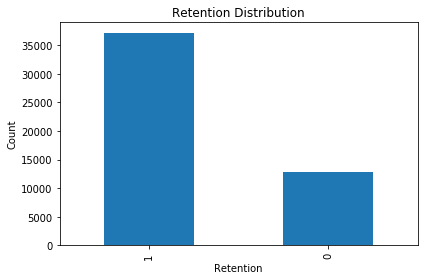

In [16]:
plt.xlabel('Retention')
plt.ylabel('Count')
plt.title('Retention Distribution')
df.retention.value_counts().plot(kind='bar')
plt.tight_layout()

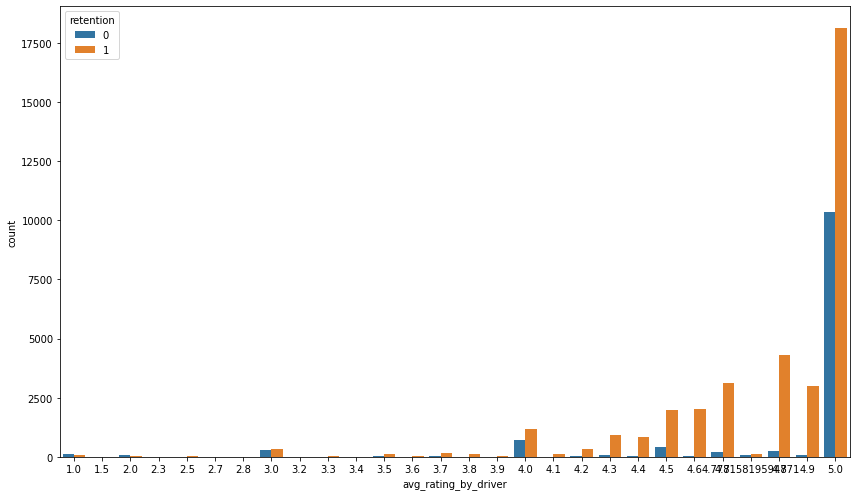

In [17]:
plt.figure(figsize=(12,7))
sns.countplot(x='avg_rating_by_driver', hue='retention', data = df)
plt.tight_layout()

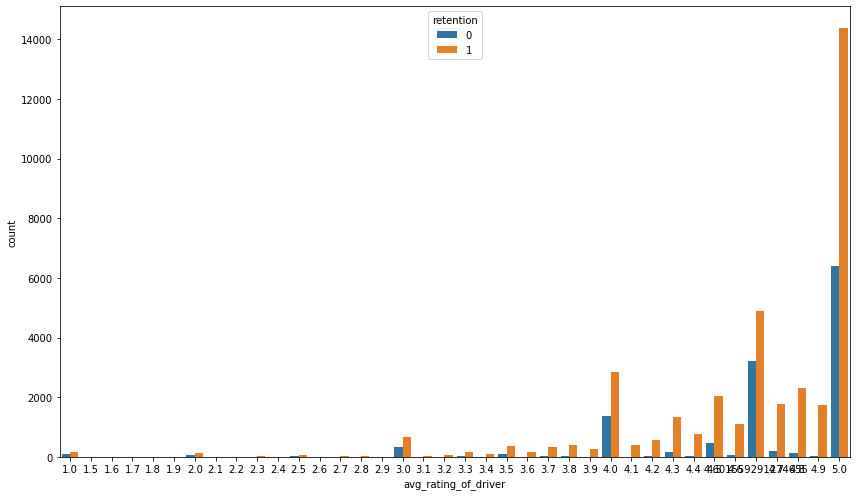

In [18]:
plt.figure(figsize=(12,7))
sns.countplot(x='avg_rating_of_driver', hue='retention', data = df)
plt.tight_layout()

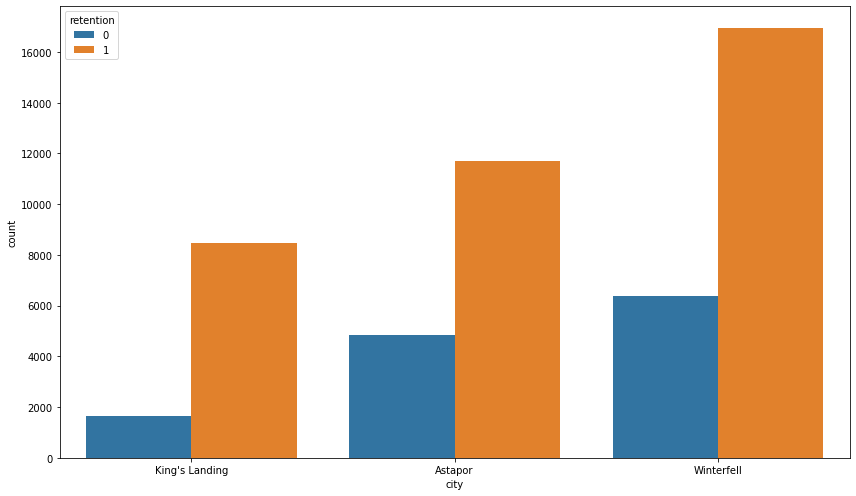

In [19]:
plt.figure(figsize=(12,7))
sns.countplot(x='city', hue='retention', data = df)
plt.tight_layout()

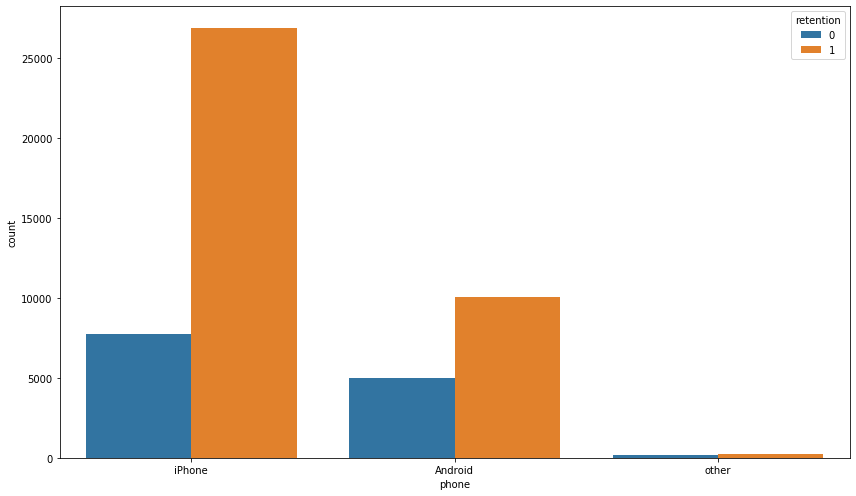

In [20]:
plt.figure(figsize=(12,7))
sns.countplot(x='phone', hue='retention', data = df)
plt.tight_layout()

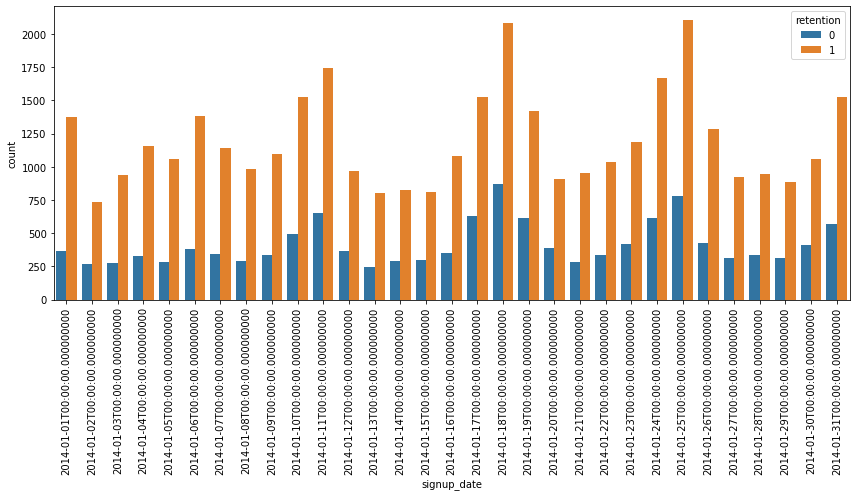

In [21]:
plt.figure(figsize=(12,7))
sns.countplot(x='signup_date', hue='retention', data = df)
plt.xticks(rotation=90)
plt.tight_layout()

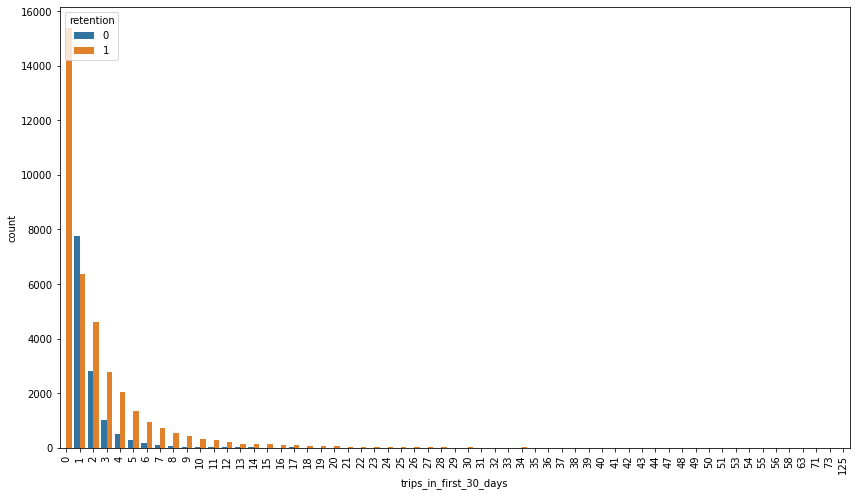

In [22]:
plt.figure(figsize=(12,7))
sns.countplot(x='trips_in_first_30_days', hue='retention', data = df)
plt.xticks(rotation=90)
plt.tight_layout()

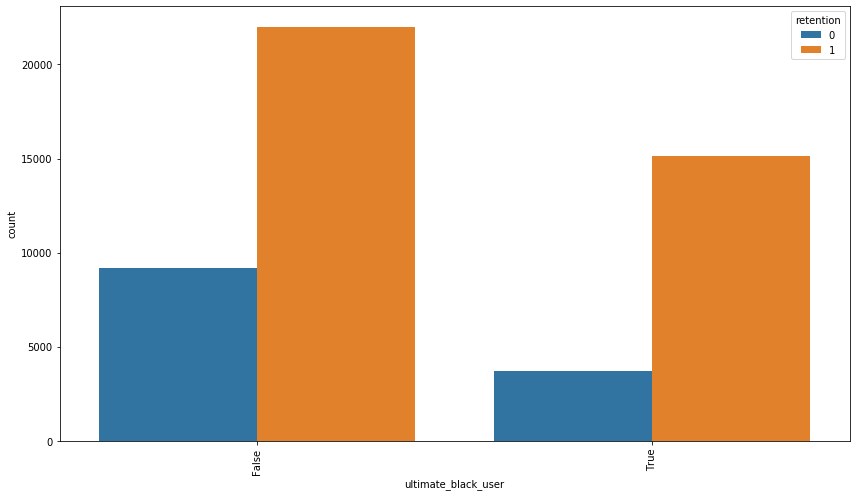

In [23]:
plt.figure(figsize=(12,7))
sns.countplot(x='ultimate_black_user', hue='retention', data = df)
plt.xticks(rotation=90)
plt.tight_layout()

# Chi-squared Test

In [24]:
from scipy.stats import chisquare
from scipy import stats

# For: City

H0: City and retention are independent.

Ha: City and retention are dependent.  

alpha = 0.05

In [25]:
chi_squared_test_city = df.groupby(['retention','city']).count()['signup_date'].unstack()
chi_squared_test_city

city,Astapor,King's Landing,Winterfell
retention,,,
0,4840,1647,6384
1,11694,8483,16952


In [26]:
obs = [[4840,1647,6384],[11694,8483,16952]]
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('chi2:',chi2)
print('DF:',dof)
print('p-value:',p)
print('Expected values:', expected)

chi2: 616.272764198554
DF: 2
p-value: 1.5068484671361196e-134
Expected values: [[ 4256.18228  2607.6646   6007.15312]
 [12277.81772  7522.3354  17328.84688]]


The p-value is less than 0.001. We reject the null hypothesis and suggest that City and retention are dependent.

# For: Phone

H0: Phone and retention are independent.

Ha: Phone and retention are dependent.  

alpha = 0.05

In [27]:
chi_squared_test_phone = df.groupby(['retention','phone']).count()['signup_date'].unstack()
chi_squared_test_phone

phone,Android,iPhone,other
retention,,,
0,4999,7711,161
1,10023,26871,235


In [28]:
obs = [[4999,7711,161],[10023,26871,235]]
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('chi2:',chi2)
print('DF:',dof)
print('p-value:',p)
print('Expected values:', expected)

chi2: 706.9771067994824
DF: 2
p-value: 3.032996034765694e-154
Expected values: [[ 3866.96324  8902.09844   101.93832]
 [11155.03676 25679.90156   294.06168]]


The chi-squared statistics is 706.98. The p-value is less than 0.001. We reject the null hypothesis.

# Machine Learning

In [29]:
#create dummies features for all the categorical columns data
new_df = pd.get_dummies(df, columns=['city','phone'], drop_first=True)

In [30]:
# convert True and False boolean into int 
new_df['ultimate_black_user'] = new_df['ultimate_black_user'].astype(int)

In [31]:
# drop last_trip_date and signup_date from the features
new_df = new_df.drop(['last_trip_date','signup_date'], axis=1)

In [32]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
trips_in_first_30_days    50000 non-null int64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null int32
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
num_active_days           50000 non-null float64
retention                 50000 non-null int32
city_King's Landing       50000 non-null uint8
city_Winterfell           50000 non-null uint8
phone_iPhone              50000 non-null uint8
phone_other               50000 non-null uint8
dtypes: float64(7), int32(2), int64(1), uint8(4)
memory usage: 3.6 MB


In [33]:
new_df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,num_active_days,retention,city_King's Landing,city_Winterfell,phone_iPhone,phone_other
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,143.0,1,1,0,1,0
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,96.0,1,0,0,0,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,1.0,0,0,0,1,0
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,170.0,1,1,0,1,0
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,47.0,1,0,1,0,0


In [34]:
# Create features X and label y
X = new_df.drop('retention', axis=1)
y = new_df['retention']

In [35]:
# import train_test_split to split data into training and testing set
from sklearn.model_selection import train_test_split

#Create a train test split of the data with test size 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123, stratify=y)

# Taking Care of Class Imbalance

In [36]:
#Import LogisticRegression
from sklearn.linear_model import LogisticRegression
#Import RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from time import time
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
# import different metrics we will use to evaluate the models
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.metrics import f1_score

#Random Undersampling
us = RandomUnderSampler(ratio=0.5, random_state=1)
X_train_res, y_train_res = us.fit_sample(X_train, y_train)

print('Distribution of class labels before resampling {}'.format(Counter(y_train)))
print('Distribution of class labels after resampling {}'.format(Counter(y_train_res)))

Distribution of class labels before resampling Counter({1: 25990, 0: 9010})
Distribution of class labels after resampling Counter({1: 18020, 0: 9010})


In [37]:
# Instantiate a logistic regression classifier: 
model = LogisticRegression(solver='warn')

# Setup the hyperparameter grid
param_grid = {'C': [0.001,0.01,0.1,1,10,100,1000]}

# Instantiate the GridSearchCV object: 
model_cv = GridSearchCV(model, param_grid=param_grid, cv=5)

# Fit it to the data
model_cv.fit(X_train_res,y_train_res)

y_pred_test = model_cv.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#resampled_score = resampled_score.append({'method': 'not resampled','recall':recall,
#'precision':precision, 'f1_score':f1score, 'AUC':roc_auc}, ignore_index=True)

# Print the tuned parameters and score
print('Tuned Logistic Regression Parameters: {}'.format(model_cv.best_params_))
print('Best score is {0:.4f}'.format(model_cv.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

model_cv

Tuned Logistic Regression Parameters: {'C': 10}
Best score is 0.9970
AUC Score: 0.9964
Accuracy Score: 0.9969
Precision Score: 0.9984
Recall Score: 0.9974
f1 score: 0.9979


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [38]:
clf_base = RandomForestClassifier()

# Setup the parameters and distributions to sample from: param_dist
param_dist = {'max_depth': range(1,10),
             'max_features': range(1,10),
             'n_estimators': [10,50,100,150,200,250,300,350,400,500]}

clf = RandomizedSearchCV(clf_base, param_dist, cv=5,n_jobs=8, scoring='f1')

start = time()

clf.fit(X_train_res, y_train_res)

print('RandomizedSearchCV took %.2f seconds for %d candidates'
      ' parameter settings.' % ((time() - start), clf.n_iter))

#to store the predicted labels
y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

# Print the tuned parameters and score
print('Tuned Random Forest with Roandom Undersampling Parameters: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

RandomizedSearchCV took 43.02 seconds for 10 candidates parameter settings.
Tuned Random Forest with Roandom Undersampling Parameters: {'n_estimators': 500, 'max_features': 9, 'max_depth': 3}
Best score is 1.0000
AUC Score: 1.0000
Accuracy Score: 1.0000
Precision Score: 1.0000
Recall Score: 1.0000
f1 score: 1.0000


In [39]:
# This function will predict using a new dataframe 
def predict_retention(data):
    return clf.predict(data)

In [40]:
# call the function to find out if the model has predicted accurately
# I am using the top five data from the testing set
# I am comparing the prediction with its test labels
predict_retention(X_test.head()) == y_test.head()

13751    True
43639    True
42185    True
20059    True
7536     True
Name: retention, dtype: bool

In [41]:
# call the function to find out if the model has predicted accurately
# I am using the bottom five data from the testing set
# I am comparing the prediction with its test labels
predict_retention(X_test.tail()) == y_test.tail()

4146     True
34804    True
19180    True
42437    True
40134    True
Name: retention, dtype: bool

First, I dealt with class imbalance because the dataset has more data for retention than non-retention rider. I used Random Undersampling technique to deal with class imbalance. There are many other methods like over sampling, SMOTE, ENN, etc. Then, I build a Logistic Regression Classifier model to predict rider retention to find the performance of the model with the data. The model performance was very good. Then, I used Random Forest Classifier to compare with Logistic Regression model because it is an ensembler machine learning model which consists of multiple decision trees in one model. We can also use Decision Tree and Support Vector Machine for this kind of classification project.

I have used model AUC score, Accuracy score, Precision score, Recall score and f1_score to validate my model's performance. 

Ultimate can use this model to predict rider retention based on the past data. The accuracy of the model is perfect according to different metrics used. The class imbalance can be dealt with more data collection in future.